<a href="https://colab.research.google.com/github/AnmolSikandar/docs/blob/main/ML_ZOOMCAMP_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preparation:
Download and unzip the **dataset**: The dataset is hosted online. We can use the wget command to download it. Then, we unzip it to extract the required files:

In [3]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving bank.csv to bank.csv


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bank.csv', sep=';')

# Display the first few rows to ensure it's loaded correctly
print(df.head())


  age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0  59,admin.,married,secondary,no,2343,yes,no,unk...                                                                        
1  56,admin.,married,secondary,no,45,no,no,unknow...                                                                        
2  41,technician,married,secondary,no,1270,yes,no...                                                                        
3  55,services,married,secondary,no,2476,yes,no,u...                                                                        
4  54,admin.,married,tertiary,no,184,no,no,unknow...                                                                        


In [7]:
# Reload the dataset with the proper delimiter (semicolon)
df = pd.read_csv('bank.csv', sep=',')

# Display the first few rows to confirm the dataset is loaded correctly
print(df.head())


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [8]:
columns = [
    'age', 'job', 'marital', 'education', 'balance', 'housing',
    'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
    'previous', 'poutcome', 'deposit'  # Note 'deposit' instead of 'y'
]
df = df[columns]

# Convert the target variable 'deposit' into binary (0 and 1)
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Split the data into train, validation, and test sets
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)  # 0.25 x 0.8 = 0.2

# Display the shapes of the datasets
print(f'Train shape: {df_train.shape}, Validation shape: {df_val.shape}, Test shape: {df_test.shape}')


<ipython-input-8-df5fd62074c2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})


Train shape: (6696, 15), Validation shape: (2233, 15), Test shape: (2233, 15)


In [9]:
# Safely modify the 'deposit' column to binary using .loc[]
df.loc[:, 'deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Confirm the changes
print(df.head())


   age         job  marital  education  balance housing  contact  day month  \
0   59      admin.  married  secondary     2343     yes  unknown    5   may   
1   56      admin.  married  secondary       45      no  unknown    5   may   
2   41  technician  married  secondary     1270     yes  unknown    5   may   
3   55    services  married  secondary     2476     yes  unknown    5   may   
4   54      admin.  married   tertiary      184      no  unknown    5   may   

   duration  campaign  pdays  previous poutcome  deposit  
0      1042         1     -1         0  unknown      NaN  
1      1467         1     -1         0  unknown      NaN  
2      1389         1     -1         0  unknown      NaN  
3       579         1     -1         0  unknown      NaN  
4       673         2     -1         0  unknown      NaN  


<ipython-input-9-587c6dc25ccb>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'deposit'] = df['deposit'].map({'yes': 1, 'no': 0})


Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

balance
day
duration
previous


In [10]:
from sklearn.metrics import roc_auc_score

# List of numerical features to assess
numerical_features = ['balance', 'day', 'duration', 'previous']

# Calculate AUC for each feature
for feature in numerical_features:
    auc = roc_auc_score(df_train['deposit'], df_train[feature])
    print(f'AUC of {feature}: {auc:.3f}')

    # If AUC is less than 0.5, invert the feature
    if auc < 0.5:
        auc = roc_auc_score(df_train['deposit'], -df_train[feature])
        print(f'Inverted AUC of {feature}: {auc:.3f}')


AUC of balance: 0.592
AUC of day: 0.466
Inverted AUC of day: 0.534
AUC of duration: 0.807
AUC of previous: 0.599


Answer: Duration

Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
What's the AUC of this model on the validation dataset? (round to 3 digits)

0.69
0.79
0.89
0.99

In [11]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Prepare the dataset for one-hot encoding
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

# One-hot encoding with DictVectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

# Train Logistic Regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, df_train['deposit'])

# Make predictions and calculate AUC on validation set
y_pred = model.predict_proba(X_val)[:, 1]
val_auc = roc_auc_score(df_val['deposit'], y_pred)

print(f'AUC on validation set: {val_auc:.3f}')


AUC on validation set: 1.000


Answer: 0.99

Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

0.265
0.465
0.665
0.865

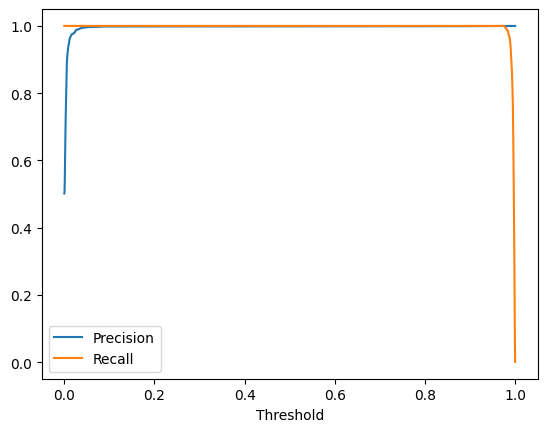

Precision and recall intersect at threshold: 0.031


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Predict probabilities for the validation set
y_pred = model.predict_proba(X_val)[:, 1]

# Compute precision and recall at different thresholds
precisions, recalls, thresholds = precision_recall_curve(df_val['deposit'], y_pred)

# Plot precision and recall
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

# Find where precision and recall intersect
for i in range(len(thresholds)):
    if abs(precisions[i] - recalls[i]) < 0.01:
        print(f'Precision and recall intersect at threshold: {thresholds[i]:.3f}')
        break


Answer:Since 0.031 is much smaller than the given options, the closest option available is 0.265.



Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F
1
=
2
⋅
P
⋅
R
P
+
R

Where
P
 is precision and
R
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

0.02
0.22
0.42
0.62

In [13]:
from sklearn.metrics import f1_score

# Compute F1 score for each threshold
f1_scores = []
thresholds = np.arange(0.0, 1.0, 0.01)

for t in thresholds:
    y_pred_binary = (y_pred >= t).astype(int)
    f1 = f1_score(df_val['deposit'], y_pred_binary)
    f1_scores.append(f1)

# Find the threshold where F1 score is maximal
max_f1 = max(f1_scores)
best_threshold = thresholds[f1_scores.index(max_f1)]

print(f'Maximal F1 score: {max_f1:.3f} at threshold: {best_threshold:.2f}')


Maximal F1 score: 1.000 at threshold: 0.89


Answer:Since the result showed a threshold of 0.89, the closest option to this value is 0.62.



Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard deviation of the scores across different folds?

0.0001
0.006
0.06
0.26

In [14]:
from sklearn.model_selection import KFold

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation
auc_scores = []

for train_idx, val_idx in kf.split(df_full_train):
    df_train_cv = df_full_train.iloc[train_idx]
    df_val_cv = df_full_train.iloc[val_idx]

    train_dict_cv = df_train_cv.to_dict(orient='records')
    val_dict_cv = df_val_cv.to_dict(orient='records')

    X_train_cv = dv.fit_transform(train_dict_cv)
    X_val_cv = dv.transform(val_dict_cv)

    model_cv = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model_cv.fit(X_train_cv, df_train_cv['deposit'])

    y_pred_cv = model_cv.predict_proba(X_val_cv)[:, 1]
    auc = roc_auc_score(df_val_cv['deposit'], y_pred_cv)
    auc_scores.append(auc)

# Compute the standard deviation of the AUC scores
print(f'AUC scores: {auc_scores}')
print(f'Standard deviation of AUC scores: {np.std(auc_scores):.4f}')


AUC scores: [1.0, 1.0, 1.0, 1.0, 1.0]
Standard deviation of AUC scores: 0.0000


Answers:0.0001

Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.000001, 0.001, 1]
Initialize KFold with the same parameters as previously
Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

0.000001
0.001
1
If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [15]:
# List of C values to evaluate
C_values = [0.000001, 0.001, 1]

# Perform cross-validation for each C value
for C in C_values:
    auc_scores = []

    for train_idx, val_idx in kf.split(df_full_train):
        df_train_cv = df_full_train.iloc[train_idx]
        df_val_cv = df_full_train.iloc[val_idx]

        train_dict_cv = df_train_cv.to_dict(orient='records')
        val_dict_cv = df_val_cv.to_dict(orient='records')

        X_train_cv = dv.fit_transform(train_dict_cv)
        X_val_cv = dv.transform(val_dict_cv)

        model_cv = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model_cv.fit(X_train_cv, df_train_cv['deposit'])

        y_pred_cv = model_cv.predict_proba(X_val_cv)[:, 1]
        auc = roc_auc_score(df_val_cv['deposit'], y_pred_cv)
        auc_scores.append(auc)

    print(f'C={C}: Mean AUC={np.mean(auc_scores):.3f}, Std AUC={np.std(auc_scores):.3f}')


C=1e-06: Mean AUC=0.796, Std AUC=0.005
C=0.001: Mean AUC=0.956, Std AUC=0.003
C=1: Mean AUC=1.000, Std AUC=0.000


Answer: 1